# Building Anime Recommender systems

In [44]:
# Anime Recommender System
!pip install surprise

## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy


# **Loading Dataset**

In [53]:
# Load the datasets
anime_df = pd.read_csv('anime.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('submission.csv')

# Display the first few rows of each dataset
print("Anime Dataframe:")
print(anime_df.head())

print("\nTrain Dataframe:")
print(train_df.head())

print("\nTest Dataframe:")
print(test_df.head())


Anime Dataframe:
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  

Train Dataframe:
   user_id  anime_id  rating
0        1     11617      10
1        1     11757      10
2        1     15451    

# **Data Preprocessing**

In [54]:
# Convert categorical 'type' column to numerical
label_encoder = LabelEncoder()
anime_df['type'] = label_encoder.fit_transform(anime_df['type'])

# Check for missing values
print("\nMissing values in Anime Dataframe:")
print(anime_df.isnull().sum())

print("\nMissing values in Train Dataframe:")
print(train_df.isnull().sum())

# Remove rows with missing ratings in the train dataset
train_df = train_df[train_df['rating'] != -1]



Missing values in Anime Dataframe:
anime_id      0
name          0
genre        62
type          0
episodes      0
rating      230
members       0
dtype: int64

Missing values in Train Dataframe:
user_id     0
anime_id    0
rating      0
dtype: int64


# **Exploratory Data Analysis**

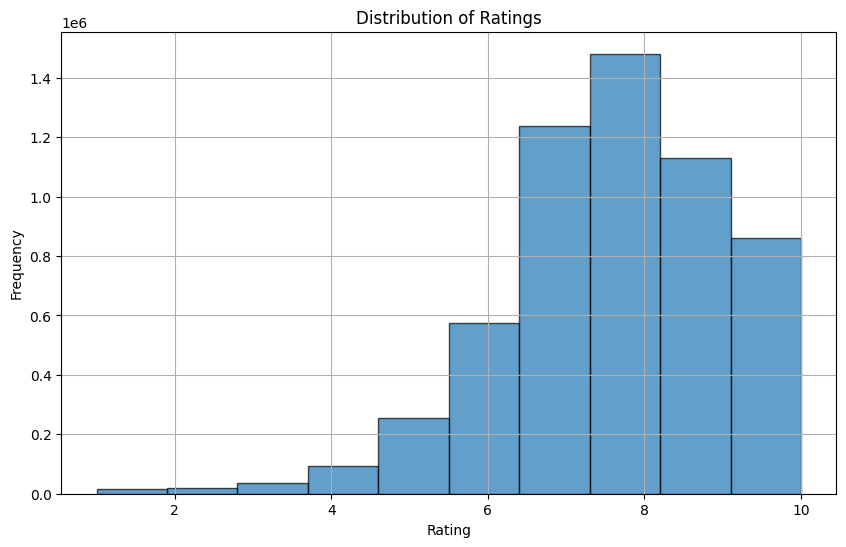

In [55]:
# Plot distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(train_df['rating'].dropna(), bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# **Prepare Data for Surprise**

In [56]:
# Define a reader and load the dataset
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(train_df[['user_id', 'anime_id', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)


# **Train the model**

In [57]:
# Train the model using SVD
model = SVD()
model.fit(trainset)


# **Evaluate the model**

In [64]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy

# Define Reader
reader = Reader(line_format='user item rating timestamp', sep=',')

# Load data
data = Dataset.load_from_df(train_df[['user_id', 'anime_id', 'rating']], reader)

# Split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)  # Adjust test_size as needed

# Train your model
model = SVD()  # Example: SVD algorithm
model.fit(trainset)

# Generate test set for predictions
testset_for_predictions = [(uid, iid, None) for uid, iid in zip(test_df['user_id'], test_df['anime_id'])]
predictions = model.test(testset_for_predictions)

# Evaluate model using cross-validation
cross_validate_results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("Model evaluation results:")
print(f"Mean RMSE: {cross_validate_results['test_rmse'].mean()}")
print(f"Mean MAE: {cross_validate_results['test_mae'].mean()}")


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.2144  3.2175  3.2157  3.2171  3.2170  3.2163  0.0011  
MAE (testset)     2.9057  2.9084  2.9066  2.9075  2.9083  2.9073  0.0010  
Fit time          104.92  111.41  110.91  110.66  119.48  111.48  4.65    
Test time         29.83   30.04   22.84   23.90   27.70   26.86   2.98    
Model evaluation results:
Mean RMSE: 3.216328050253157
Mean MAE: 2.9073110564002365


# **Generate prediction for the test set**

In [59]:
# Predict ratings for the test set
# Prepare the test set with a dummy r_ui value
testset = [(uid, iid, None) for uid, iid in zip(test_df['user_id'], test_df['anime_id'])]
predictions = model.test(testset)


# Prepare the submission
submission_df = pd.DataFrame({
    'ID': [f"{pred.uid}_{pred.iid}" for pred in predictions],
    'rating': [pred.est for pred in predictions]
})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)
print("\nSubmission file created successfully.")



Submission file created successfully.
